In [31]:
# Filtrando resultados
df[ df['Idade'] > 25]

,Nome,Idade,Cidade
6,Davi,40,Curitiba


In [37]:
# Operações Matemáticas
df['Idade'].mean()

22.714285714285715

In [43]:
# Inclusivo, exclusivo --> exclui o 3 e 2
df.iloc[1:3, 0:2]

,Nome,Idade
1,Kauan,22
2,Stephane,21


In [47]:
# Inclusivo
df.loc[:3, 'Nome']

0         Ana
1       Kauan
2    Stephane
3    Mauricio
Name: Nome, dtype: object

In [51]:
# Selecionar a coluna nome e as 2 primeiras linhas
df.loc[:1, 'Nome']

0      Ana
1    Kauan
Name: Nome, dtype: object

In [57]:
# Filtrar pessoas com mais de 25 anos e mostrar apenas o nome e cidade
df.loc[ df['Idade'] > 25, ['Nome', 'Cidade']]

,Nome,Cidade
6,Davi,Curitiba


In [63]:
# Adicionando coluna
import numpy as np
df['Salário'] = [2_500.00, 3_500.00, 7_250.00, 50_000.00, 1_000_000, 15_000.00, np.nan]
df.tail()

,Nome,Idade,Cidade,Salário
2,Stephane,21,Parnaiba,7250.0
3,Mauricio,19,Porto Alegre,50000.0
4,Lucas,20,Guaramirim,1000000.0
5,Gustavo,19,Jaraguá do Sul,15000.0
6,Davi,40,Curitiba,NaN


In [87]:
# Criando uma coluna baseada em outra
df['Idade daqui 10 anos'] = df['Idade'] + 10
df = df.drop('Idade', axis=1)
df.head()

,Nome,Cidade,Salário,Idade daqui 10 anos
0,Ana,Jaraguá do Sul,2500.0,28
1,Kauan,Jaraguá do Sul,3500.0,32
2,Stephane,Parnaiba,7250.0,31
3,Mauricio,Porto Alegre,50000.0,29
4,Lucas,Guaramirim,1000000.0,30


In [93]:
# Renomenado coluna
df = df.rename(columns = {'Nome': 'Nome Completo'})
df.head()

,Nome Completo,Cidade,Salário,Idade daqui 10 anos
0,Ana,Jaraguá do Sul,2500.0,28
1,Kauan,Jaraguá do Sul,3500.0,32
2,Stephane,Parnaiba,7250.0,31
3,Mauricio,Porto Alegre,50000.0,29
4,Lucas,Guaramirim,1000000.0,30


In [101]:
# Ordenando
df.sort_values(by='Idade daqui 10 anos').reset_index(drop=True)

,Nome Completo,Cidade,Salário,Idade daqui 10 anos
0,Ana,Jaraguá do Sul,2500.0,28
1,Mauricio,Porto Alegre,50000.0,29
2,Gustavo,Jaraguá do Sul,15000.0,29
3,Lucas,Guaramirim,1000000.0,30
4,Stephane,Parnaiba,7250.0,31
5,Kauan,Jaraguá do Sul,3500.0,32
6,Davi,Curitiba,NaN,50


In [123]:
# Agrupamento
agrupamento_cidade = df.groupby(['Cidade'])['Salário']
agrupamento_cidade.agg(['mean', 'median', 'sum', 'std'])

,mean,median,sum,std
Cidade,,,,
Curitiba,NaN,NaN,0.0,NaN
Guaramirim,1000000.0,1000000.0,1000000.0,NaN
Jaraguá do Sul,7000.0,3500.0,21000.0,6946.221995
Parnaiba,7250.0,7250.0,7250.0,NaN
Porto Alegre,50000.0,50000.0,50000.0,NaN


In [131]:
# Identificando nulos
df.isnull()

# Preenchendo com 0
df = df.fillna( df['Salário'].mean())

# Removendo nulos
df.dropna()

,Nome Completo,Cidade,Salário,Idade daqui 10 anos
0,Ana,Jaraguá do Sul,2500.000000,28
1,Kauan,Jaraguá do Sul,3500.000000,32
2,Stephane,Parnaiba,7250.000000,31
3,Mauricio,Porto Alegre,50000.000000,29
4,Lucas,Guaramirim,1000000.000000,30
5,Gustavo,Jaraguá do Sul,15000.000000,29
6,Davi,Curitiba,179708.333333,50


Atividade

Segue abaixo a solução da atividade proposta

In [185]:
# Criando o DF

produtos = {
    'Produto': ['Teclado', 'Mouse', 'Caneta', 'Caderno', 'Fone'],
    'Categoria': ['Eletrônico', 'Eletrônico', 'Escritório', 'Escritório', 'Eletrônico'],
    'Vendas': [ 120, 85, 300, 150, 200],
    'Preço': [80, 40, 2, 15, 120]
}

df_produtos = pd.DataFrame(produtos)
df_produtos.head()

,Produto,Categoria,Vendas,Preço
0,Teclado,Eletrônico,120,80
1,Mouse,Eletrônico,85,40
2,Caneta,Escritório,300,2
3,Caderno,Escritório,150,15
4,Fone,Eletrônico,200,120


In [187]:
# Calculando faturamento
df_produtos['Faturamento'] = df_produtos['Vendas'] * df_produtos['Preço']
df_produtos.head()

,Produto,Categoria,Vendas,Preço,Faturamento
0,Teclado,Eletrônico,120,80,9600
1,Mouse,Eletrônico,85,40,3400
2,Caneta,Escritório,300,2,600
3,Caderno,Escritório,150,15,2250
4,Fone,Eletrônico,200,120,24000


In [189]:
# Filtrando produtos com faturamento maior que 5000
df_filtrados = df_produtos[df_produtos['Faturamento'] > 5000]
df_filtrados.head()

,Produto,Categoria,Vendas,Preço,Faturamento
0,Teclado,Eletrônico,120,80,9600
4,Fone,Eletrônico,200,120,24000


In [191]:
# Agrupe por categoria e mostre o faturamento total por categoria
df_faturamento = df_produtos.groupby('Categoria')[['Faturamento']].sum()
df_faturamento.head()

,Faturamento
Categoria,
Eletrônico,37000
Escritório,2850


In [193]:
# Salve o resultado em CSV
df_produtos.to_csv('Produtos', index=False)
df_faturamento.to_csv('Faturamento', index=False)

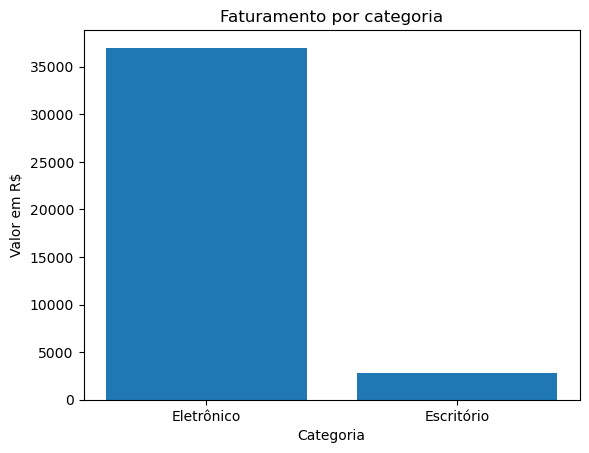

In [197]:
# Exibindo em matplot
import matplotlib.pyplot as plt
plt.bar(df_faturamento.index, df_faturamento['Faturamento'].values)
plt.xlabel("Categoria")
plt.ylabel("Valor em R$")
plt.title("Faturamento por categoria")
plt.show()